# Cleaning data

## 1. Import Required Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.max_rows', 100)

# Disable warnings
warnings.filterwarnings('ignore')

## 2. Load the Dataset

In [2]:
# Load the final dataset
data_path = "../../data/FINAL_DATA.csv"
df = pd.read_csv(data_path)

## 3. Dataset Overview

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Unnamed: 0,Month,Country,HBT,TreatmentLocation,DepartmentType,NumberOfAttendancesAll,NumberWithin4HoursAll,NumberOver4HoursAll,NumberOfAttendancesEpisode,NumberWithin4HoursEpisode,NumberOver4HoursEpisode,NumberOver8HoursEpisode,NumberOver12HoursEpisode,HospitalName,Postcode,HealthBoard,HSCP,CouncilArea,IntermediateZone,DataZone,AllAges,Age,Population
0,1441888,202406,S92000003,S08000015,A101H,Type 3,362,355,7,NaN,NaN,NaN,NaN,NaN,Arran War Memorial Hospital,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176,552.0,0,2.0
1,1441889,202406,S92000003,S08000015,A101H,Type 3,362,355,7,NaN,NaN,NaN,NaN,NaN,Arran War Memorial Hospital,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176,552.0,1,5.0
2,1441890,202406,S92000003,S08000015,A101H,Type 3,362,355,7,NaN,NaN,NaN,NaN,NaN,Arran War Memorial Hospital,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176,552.0,2,3.0
3,1441891,202406,S92000003,S08000015,A101H,Type 3,362,355,7,NaN,NaN,NaN,NaN,NaN,Arran War Memorial Hospital,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176,552.0,3,5.0
4,1441892,202406,S92000003,S08000015,A101H,Type 3,362,355,7,NaN,NaN,NaN,NaN,NaN,Arran War Memorial Hospital,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176,552.0,4,3.0


In [4]:
# Display last few rows
print("Last 5 rows of the dataset:")
display(df.tail())

Last 5 rows of the dataset:


,Unnamed: 0,Month,Country,HBT,TreatmentLocation,DepartmentType,NumberOfAttendancesAll,NumberWithin4HoursAll,NumberOver4HoursAll,NumberOfAttendancesEpisode,NumberWithin4HoursEpisode,NumberOver4HoursEpisode,NumberOver8HoursEpisode,NumberOver12HoursEpisode,HospitalName,Postcode,HealthBoard,HSCP,CouncilArea,IntermediateZone,DataZone,AllAges,Age,Population
67711,1509599,202505,S92000003,S08000028,W108H,Type 3,197,196,1,197.0,196.0,1.0,0.0,0.0,Uist & Barra Hospital,HS7 5LA,S08000028,S37000031,S12000013,S02001688,S01009020,792.0,86,2.0
67712,1509600,202505,S92000003,S08000028,W108H,Type 3,197,196,1,197.0,196.0,1.0,0.0,0.0,Uist & Barra Hospital,HS7 5LA,S08000028,S37000031,S12000013,S02001688,S01009020,792.0,87,2.0
67713,1509601,202505,S92000003,S08000028,W108H,Type 3,197,196,1,197.0,196.0,1.0,0.0,0.0,Uist & Barra Hospital,HS7 5LA,S08000028,S37000031,S12000013,S02001688,S01009020,792.0,88,1.0
67714,1509602,202505,S92000003,S08000028,W108H,Type 3,197,196,1,197.0,196.0,1.0,0.0,0.0,Uist & Barra Hospital,HS7 5LA,S08000028,S37000031,S12000013,S02001688,S01009020,792.0,89,1.0
67715,1509603,202505,S92000003,S08000028,W108H,Type 3,197,196,1,197.0,196.0,1.0,0.0,0.0,Uist & Barra Hospital,HS7 5LA,S08000028,S37000031,S12000013,S02001688,S01009020,792.0,90+,2.0


## 4. Column Analysis

In [5]:
# Display column information
print("Column Information:")
print("=" * 50)

# Create a comprehensive column info dataframe
column_info = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes,
    'Non_Null_Count': df.count(),
    'Null_Count': df.isnull().sum(),
    'Null_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Unique_Values': [df[col].nunique() for col in df.columns],
    'Memory_Usage_KB': (df.memory_usage(deep=True)[1:] / 1024).round(2)
})

display(column_info)

Column Information:


,Column,Data_Type,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values,Memory_Usage_KB
Unnamed: 0,Unnamed: 0,int64,67716,0,0.00,67716,529.03
Month,Month,int64,67716,0,0.00,12,529.03
Country,Country,object,67716,0,0.00,1,4364.51
HBT,HBT,object,67716,0,0.00,14,4364.51
TreatmentLocation,TreatmentLocation,object,67716,0,0.00,63,4099.99
DepartmentType,DepartmentType,object,67716,0,0.00,2,4166.12
NumberOfAttendancesAll,NumberOfAttendancesAll,int64,67716,0,0.00,650,529.03
NumberWithin4HoursAll,NumberWithin4HoursAll,int64,67716,0,0.00,642,529.03
NumberOver4HoursAll,NumberOver4HoursAll,int64,67716,0,0.00,392,529.03
NumberOfAttendancesEpisode,NumberOfAttendancesEpisode,float64,51324,16392,24.21,535,529.03


## 4.1. Data Cleaning

Based on the column analysis, we will remove unnecessary columns and clean the dataset by:
1. Removing specified columns that are not needed for analysis
2. Dropping rows with missing values
3. Saving the cleaned dataset

In [6]:
# Data cleaning operations
print("Starting data cleaning process...")
print(f"Original dataset shape: {df.shape}")

# List of columns to remove
columns_to_remove = [
    'Unnamed: 0',
    'NumberOfAttendancesEpisode', 
    'NumberWithin4HoursEpisode',
    'NumberOver4HoursEpisode',
    'NumberOver8HoursEpisode',
    'NumberOver12HoursEpisode'
]

# Check which columns actually exist in the dataset
existing_columns_to_remove = [col for col in columns_to_remove if col in df.columns]
missing_columns = [col for col in columns_to_remove if col not in df.columns]

print(f"\nColumns to remove that exist in dataset: {existing_columns_to_remove}")
if missing_columns:
    print(f"Columns not found in dataset: {missing_columns}")

# Remove existing columns
if existing_columns_to_remove:
    df_clean = df.drop(columns=existing_columns_to_remove)
    print(f"Removed {len(existing_columns_to_remove)} columns")
else:
    df_clean = df.copy()
    print("No columns were removed")

print(f"Dataset shape after column removal: {df_clean.shape}")

# Check for missing values before dropping
missing_before = df_clean.isnull().sum().sum()
rows_with_na = df_clean.isnull().any(axis=1).sum()

print(f"\nMissing values before cleaning: {missing_before}")
print(f"Rows with at least one NA value: {rows_with_na}")

# Drop rows with any missing values
df_clean = df_clean.dropna()

print(f"Dataset shape after removing NA rows: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

# Verify no missing values remain
missing_after = df_clean.isnull().sum().sum()
print(f"Missing values after cleaning: {missing_after}")

# Save the cleaned dataset
output_path = "../../data/FINAL_DATA_clean.csv"
df_clean.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to: {output_path}")

# Display summary of cleaned dataset
print(f"\nCLEANED DATASET SUMMARY:")
print(f"• Final shape: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")
print(f"• Data completeness: 100%")
print(f"• Memory usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Starting data cleaning process...
Original dataset shape: (67716, 24)

Columns to remove that exist in dataset: ['Unnamed: 0', 'NumberOfAttendancesEpisode', 'NumberWithin4HoursEpisode', 'NumberOver4HoursEpisode', 'NumberOver8HoursEpisode', 'NumberOver12HoursEpisode']
Removed 6 columns
Dataset shape after column removal: (67716, 18)

Missing values before cleaning: 120
Rows with at least one NA value: 12
Dataset shape after removing NA rows: (67704, 18)
Rows removed: 12
Missing values after cleaning: 0
Missing values after cleaning: 0

Cleaned dataset saved to: ../../data/FINAL_DATA_clean.csv

CLEANED DATASET SUMMARY:
• Final shape: 67,704 rows × 18 columns
• Data completeness: 100%
• Memory usage: 54.73 MB

Cleaned dataset saved to: ../../data/FINAL_DATA_clean.csv

CLEANED DATASET SUMMARY:
• Final shape: 67,704 rows × 18 columns
• Data completeness: 100%
• Memory usage: 54.73 MB


In [10]:
# Display first few rows of cleaned dataset
print("First 5 rows of the cleaned dataset:")
display(df_clean.head())

First 5 rows of the cleaned dataset:


,Month,Country,HBT,TreatmentLocation,DepartmentType,NumberOfAttendancesAll,NumberWithin4HoursAll,NumberOver4HoursAll,HospitalName,Postcode,HealthBoard,HSCP,CouncilArea,IntermediateZone,DataZone,AllAges,Age,Population
0,202406,S92000003,S08000015,A101H,Type 3,362,355,7,Arran War Memorial Hospital,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176,552.0,0,2.0
1,202406,S92000003,S08000015,A101H,Type 3,362,355,7,Arran War Memorial Hospital,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176,552.0,1,5.0
2,202406,S92000003,S08000015,A101H,Type 3,362,355,7,Arran War Memorial Hospital,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176,552.0,2,3.0
3,202406,S92000003,S08000015,A101H,Type 3,362,355,7,Arran War Memorial Hospital,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176,552.0,3,5.0
4,202406,S92000003,S08000015,A101H,Type 3,362,355,7,Arran War Memorial Hospital,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176,552.0,4,3.0


## 4.2. Geographical Data Integration

In this section, we will merge the cleaned dataset with geographical shapefiles to add spatial information. 

The process follows the approach used in `utils/add_geography.R`:
1. Load the Scottish Data Zone shapefiles (SG_DataZone_Bdry_2011.shp)
2. Filter shapefiles to include only Data Zones present in our dataset
3. Perform a left join to add geographical boundaries to our data
4. Create a spatial dataset that can be used for geographical analysis and mapping

This integration allows us to:
- Visualize A&E data on maps
- Perform spatial analysis (nearest hospital, catchment areas)
- Analyze geographical patterns in A&E utilization
- Support location optimization models

In [7]:
# Check if required libraries for geographical data are available
try:
    import geopandas as gpd
    print("✓ GeoPandas is available")
    geopandas_available = True
except ImportError:
    print("⚠ GeoPandas not available. Install with: pip install geopandas")
    geopandas_available = False

try:
    import shapely
    print("✓ Shapely is available")
    shapely_available = True
except ImportError:
    print("⚠ Shapely not available. Install with: pip install shapely")
    shapely_available = False

try:
    import fiona
    print("✓ Fiona is available")
    fiona_available = True
except ImportError:
    print("⚠ Fiona not available. Install with: pip install fiona")
    fiona_available = False

# Check if all required libraries are available
geo_libs_available = geopandas_available and shapely_available and fiona_available

if geo_libs_available:
    print("\n✓ All required geographical libraries are available. Proceeding with shapefile merge.")
else:
    print("\n⚠ Some geographical libraries are missing. Geographical analysis will be skipped.")
    print("To install all required libraries, run:")
    print("pip install geopandas shapely fiona")

✓ GeoPandas is available
✓ Shapely is available
✓ Fiona is available

✓ All required geographical libraries are available. Proceeding with shapefile merge.
✓ Fiona is available

✓ All required geographical libraries are available. Proceeding with shapefile merge.


In [8]:
if geo_libs_available:
    try:
        # Load the Scottish Data Zone shapefiles
        shapefile_path = "../../data/shapefiles/SG_DataZone_Bdry_2011.shp"
        print(f"Loading shapefiles from: {shapefile_path}")
        
        # Read the shapefile
        dz_shapefile = gpd.read_file(shapefile_path)
        print(f"Shapefile loaded successfully: {dz_shapefile.shape[0]} geometries")
        print(f"Shapefile columns: {list(dz_shapefile.columns)}")
        
        # Check the coordinate reference system
        print(f"Coordinate Reference System: {dz_shapefile.crs}")
        
        # Display first few rows of shapefile
        print("\nFirst 3 rows of shapefile data:")
        display(dz_shapefile.head(3))
        
    except Exception as e:
        print(f"Error loading shapefile: {e}")
        geo_libs_available = False
else:
    print("Skipping shapefile loading due to missing libraries.")

Loading shapefiles from: ../../data/shapefiles/SG_DataZone_Bdry_2011.shp
Shapefile loaded successfully: 6976 geometries
Shapefile columns: ['DataZone', 'Name', 'TotPop2011', 'ResPop2011', 'HHCnt2011', 'StdAreaHa', 'StdAreaKm2', 'Shape_Leng', 'Shape_Area', 'geometry']
Coordinate Reference System: EPSG:27700

First 3 rows of shapefile data:
Shapefile loaded successfully: 6976 geometries
Shapefile columns: ['DataZone', 'Name', 'TotPop2011', 'ResPop2011', 'HHCnt2011', 'StdAreaHa', 'StdAreaKm2', 'Shape_Leng', 'Shape_Area', 'geometry']
Coordinate Reference System: EPSG:27700

First 3 rows of shapefile data:


,DataZone,Name,TotPop2011,ResPop2011,HHCnt2011,StdAreaHa,StdAreaKm2,Shape_Leng,Shape_Area,geometry
0,S01006506,Culter - 01,872,852,424,438.880218,4.388801,11801.872345,4.388802e+06,"POLYGON ((383285.265 800510.607, 383348.492 80..."
1,S01006507,Culter - 02,836,836,364,22.349739,0.223498,2900.406362,2.217468e+05,"POLYGON ((383527.919 801536.276, 383541.089 80..."
2,S01006508,Culter - 03,643,643,340,27.019476,0.270194,3468.761949,2.701948e+05,"POLYGON ((383473 801227, 383597 801087, 383598..."


In [9]:
if geo_libs_available:
    try:
        # Explore the relationship between datasets before merging
        print("EXPLORING MERGE COMPATIBILITY:")
        print("=" * 50)
        
        # Check if DataZone column exists in cleaned dataset
        if 'DataZone' in df_clean.columns:
            # Get unique DataZones from both datasets
            data_zones_in_data = set(df_clean['DataZone'].unique())
            data_zones_in_shapefile = set(dz_shapefile['DataZone'].unique())
            
            print(f"Unique DataZones in cleaned dataset: {len(data_zones_in_data)}")
            print(f"Unique DataZones in shapefile: {len(data_zones_in_shapefile)}")
            
            # Find intersection and differences
            common_zones = data_zones_in_data.intersection(data_zones_in_shapefile)
            data_only_zones = data_zones_in_data - data_zones_in_shapefile
            shapefile_only_zones = data_zones_in_shapefile - data_zones_in_data
            
            print(f"DataZones present in both datasets: {len(common_zones)}")
            print(f"DataZones only in data (no geometry): {len(data_only_zones)}")
            print(f"DataZones only in shapefile (no data): {len(shapefile_only_zones)}")
            
            # Calculate merge coverage
            coverage_percentage = (len(common_zones) / len(data_zones_in_data)) * 100
            print(f"Merge coverage: {coverage_percentage:.2f}% of data will have geometry")
            
            if len(data_only_zones) > 0:
                print(f"\nSample DataZones in data but not in shapefile: {list(data_only_zones)[:5]}")
            
            # Check if merge is feasible
            if coverage_percentage >= 80:
                print("\n✓ Merge is feasible - good coverage percentage")
                merge_feasible = True
            else:
                print("\n⚠ Low coverage percentage - merge may not be optimal")
                merge_feasible = coverage_percentage > 0
                
        else:
            print("⚠ 'DataZone' column not found in cleaned dataset")
            print("Available columns:", list(df_clean.columns))
            merge_feasible = False
            
    except Exception as e:
        print(f"Error exploring merge compatibility: {e}")
        merge_feasible = False
else:
    merge_feasible = False
    print("Merge exploration skipped due to missing libraries.")

EXPLORING MERGE COMPATIBILITY:
Unique DataZones in cleaned dataset: 59
Unique DataZones in shapefile: 6976
DataZones present in both datasets: 59
DataZones only in data (no geometry): 0
DataZones only in shapefile (no data): 6917
Merge coverage: 100.00% of data will have geometry

✓ Merge is feasible - good coverage percentage


In [10]:
if geo_libs_available and merge_feasible:
    try:
        print("PERFORMING GEOGRAPHICAL MERGE:")
        print("=" * 50)
        
        # Following the approach from utils/add_geography.R:
        # 1. Filter shapefile to include only DataZones present in our data
        print("Step 1: Filtering shapefile to relevant DataZones...")
        relevant_zones = dz_shapefile[dz_shapefile['DataZone'].isin(df_clean['DataZone'])]
        print(f"Filtered shapefile: {relevant_zones.shape[0]} geometries (from {dz_shapefile.shape[0]})")
        
        # 2. Perform left join to add geographical boundaries
        print("Step 2: Performing left join...")
        df_with_geography = relevant_zones.merge(df_clean, on='DataZone', how='left')
        print(f"Merged dataset shape: {df_with_geography.shape}")
        
        # 3. Verify the merge
        print("Step 3: Verifying merge...")
        print(f"Records with geometry: {len(df_with_geography)}")
        print(f"Records with data: {df_with_geography.notna().any(axis=1).sum()}")
        
        # 4. Display information about the merged dataset
        print("\nMERGED DATASET INFORMATION:")
        print(f"• Shape: {df_with_geography.shape[0]} rows × {df_with_geography.shape[1]} columns")
        print(f"• Geometry type: {df_with_geography.geometry.geom_type.value_counts().to_dict()}")
        print(f"• Coordinate Reference System: {df_with_geography.crs}")
        
        # 5. Show sample of merged data
        print("\nFirst 3 rows of merged geographical dataset:")
        # Display only non-geometry columns for readability
        non_geom_cols = [col for col in df_with_geography.columns if col != 'geometry']
        display(df_with_geography[non_geom_cols].head(3))
        
        print(f"\nGeographical integration successful! ✓")
        
    except Exception as e:
        print(f"Error during geographical merge: {e}")
        df_with_geography = None
        
elif not geo_libs_available:
    print("Geographical merge skipped - required libraries not available")
    df_with_geography = None
elif not merge_feasible:
    print("Geographical merge skipped - merge not feasible with current data")
    df_with_geography = None

PERFORMING GEOGRAPHICAL MERGE:
Step 1: Filtering shapefile to relevant DataZones...
Filtered shapefile: 59 geometries (from 6976)
Step 2: Performing left join...
Merged dataset shape: (67704, 27)
Step 3: Verifying merge...
Records with geometry: 67704
Records with data: 67704

MERGED DATASET INFORMATION:
• Shape: 67704 rows × 27 columns
• Geometry type: {'Polygon': 57876, 'MultiPolygon': 9828}
• Coordinate Reference System: EPSG:27700

First 3 rows of merged geographical dataset:


,DataZone,Name,TotPop2011,ResPop2011,HHCnt2011,StdAreaHa,StdAreaKm2,Shape_Leng,Shape_Area,Month,Country,HBT,TreatmentLocation,DepartmentType,NumberOfAttendancesAll,NumberWithin4HoursAll,NumberOver4HoursAll,HospitalName,Postcode,HealthBoard,HSCP,CouncilArea,IntermediateZone,AllAges,Age,Population
0,S01006563,Midstocket - 06,826,824,366,64.901189,0.649014,4986.398167,649011.882991,202406,S92000003,S08000020,N101H,Type 1,4741,2218,2523,Aberdeen Royal Infirmary,AB252ZN,S08000020,S37000001,S12000033,S02001245,874.0,0,5.0
1,S01006563,Midstocket - 06,826,824,366,64.901189,0.649014,4986.398167,649011.882991,202406,S92000003,S08000020,N101H,Type 1,4741,2218,2523,Aberdeen Royal Infirmary,AB252ZN,S08000020,S37000001,S12000033,S02001245,874.0,1,4.0
2,S01006563,Midstocket - 06,826,824,366,64.901189,0.649014,4986.398167,649011.882991,202406,S92000003,S08000020,N101H,Type 1,4741,2218,2523,Aberdeen Royal Infirmary,AB252ZN,S08000020,S37000001,S12000033,S02001245,874.0,2,7.0



Geographical integration successful! ✓


In [ ]:
# Save the geographical dataset
# geo_output_path = "../../data/FINAL_DATA_with_geography.geojson"
# df_with_geography.to_file(geo_output_path, driver='GeoJSON')
# print(f"Geographical dataset saved to: {geo_output_path}")

In [11]:
csv_output_path = "../../data/FINAL_DATA_with_geography_info.csv"
df_no_geom = df_with_geography.drop(columns=['geometry'])
df_no_geom.to_csv(csv_output_path, index=False)
print(f"Dataset with geographical info (no geometry) saved to: {csv_output_path}")

Dataset with geographical info (no geometry) saved to: ../../data/FINAL_DATA_with_geography_info.csv



Creating basic geographical visualization...


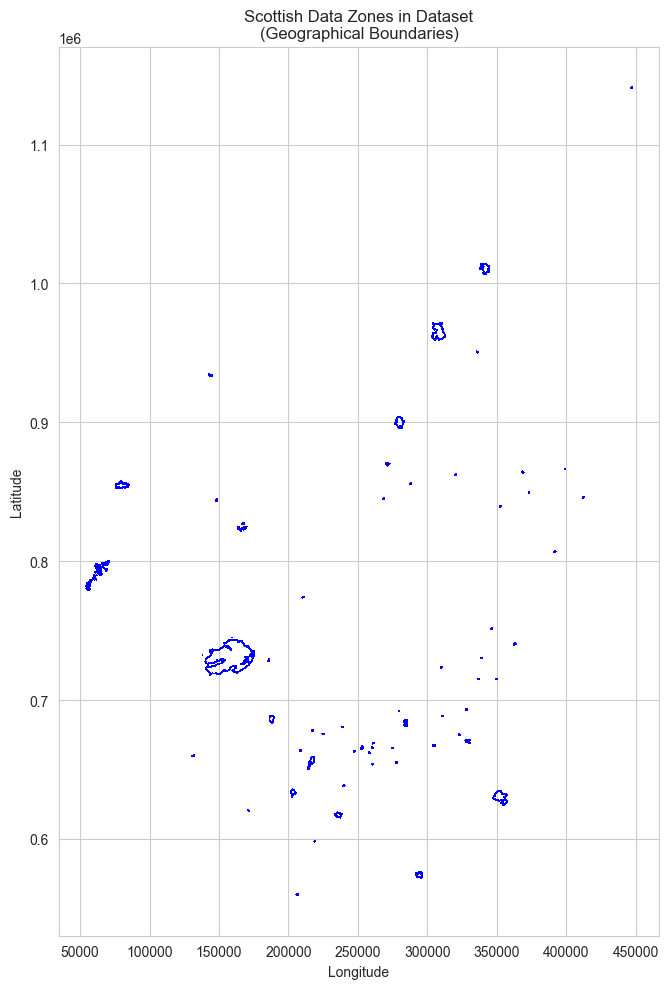


GEOGRAPHICAL INTEGRATION SUMMARY:
✓ Successfully merged 67704 geographical areas
✓ Geographical dataset saved in GeoJSON format
✓ Data with geographical info saved in CSV format
✓ Ready for spatial analysis and mapping

POSSIBLE SPATIAL ANALYSES:
• Map A&E attendance rates by geographical area
• Analyze spatial distribution of 4-hour compliance rates
• Calculate distances between population centers and hospitals
• Identify underserved geographical areas
• Perform spatial clustering analysis


In [12]:
if geo_libs_available and merge_feasible and 'df_with_geography' in locals() and df_with_geography is not None:
    try:
        
        # Basic geographical visualization
        print("\nCreating basic geographical visualization...")
        
        # Simple plot of the geographical boundaries
        fig, ax = plt.subplots(figsize=(12, 10))
        df_with_geography.boundary.plot(ax=ax, color='blue', alpha=0.7, linewidth=0.5)
        ax.set_title('Scottish Data Zones in Dataset\n(Geographical Boundaries)')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        plt.tight_layout()
        plt.show()
        
        # Summary statistics
        print("\nGEOGRAPHICAL INTEGRATION SUMMARY:")
        print("=" * 50)
        print(f"✓ Successfully merged {len(df_with_geography)} geographical areas")
        print(f"✓ Geographical dataset saved in GeoJSON format")
        print(f"✓ Data with geographical info saved in CSV format")
        print(f"✓ Ready for spatial analysis and mapping")
        
        # Suggest next steps
        print("\nPOSSIBLE SPATIAL ANALYSES:")
        print("• Map A&E attendance rates by geographical area")
        print("• Analyze spatial distribution of 4-hour compliance rates")
        print("• Calculate distances between population centers and hospitals")
        print("• Identify underserved geographical areas")
        print("• Perform spatial clustering analysis")
        
    except Exception as e:
        print(f"Error saving geographical data or creating visualization: {e}")
        
else:
    print("Geographical dataset not available for saving and visualization.")

## 4.3. Advanced Geographical Visualizations

In this section we will create comprehensive maps of Scotland showing:
1. **DataZones Map**: Complete map of Scotland with all DataZones in our dataset
2. **Hospital Locations**: Individual hospitals plotted within their respective DataZones
3. **Integrated View**: Combined visualization showing the spatial relationship between healthcare infrastructure and population areas

In [13]:
if geo_libs_available and 'df_with_geography' in locals() and df_with_geography is not None:
    try:
        # Load hospital data
        hospitals_path = "../../data/hospitals.csv"
        hospitals_df = pd.read_csv(hospitals_path)
        
        print("LOADING HOSPITAL DATA:")
        print("=" * 50)
        print(f"Hospital dataset loaded: {hospitals_df.shape[0]} hospitals")
        print(f"Hospital columns: {list(hospitals_df.columns)}")
        
        # Display first few hospitals
        print("\nFirst 5 hospitals:")
        display(hospitals_df[['HospitalCode', 'HospitalName', 'AddressLine1', 'AddressLine2', 'DataZone']].head())
        
        # Check how many hospitals are in our DataZones
        hospitals_in_our_zones = hospitals_df[hospitals_df['DataZone'].isin(df_with_geography['DataZone'])]
        print(f"\nHospitals in our DataZones: {len(hospitals_in_our_zones)} out of {len(hospitals_df)}")
        
        # Merge hospitals with geographical data to get coordinates
        hospitals_with_coords = hospitals_in_our_zones.merge(
            df_with_geography[['DataZone', 'geometry']], 
            on='DataZone', 
            how='left'
        )
        
        # Convert to GeoDataFrame
        hospitals_gdf = gpd.GeoDataFrame(hospitals_with_coords, geometry='geometry')
        
        # Get centroids for hospital point locations (hospitals will be plotted at DataZone centroids)
        hospitals_gdf['hospital_coords'] = hospitals_gdf.geometry.centroid
        
        print(f"Hospitals with coordinates: {len(hospitals_gdf)}")
        print("✓ Hospital data prepared for visualization")
        
    except Exception as e:
        print(f"Error loading hospital data: {e}")
        hospitals_gdf = None
else:
    print("Hospital data loading skipped - geographical data not available")
    hospitals_gdf = None

LOADING HOSPITAL DATA:
Hospital dataset loaded: 245 hospitals
Hospital columns: ['HospitalCode', 'HospitalName', 'AddressLine1', 'AddressLine2', 'AddressLine2QF', 'AddressLine3', 'AddressLine3QF', 'AddressLine4', 'AddressLine4QF', 'Postcode', 'HealthBoard', 'HSCP', 'CouncilArea', 'IntermediateZone', 'DataZone']

First 5 hospitals:


,HospitalCode,HospitalName,AddressLine1,AddressLine2,DataZone
0,A101H,Arran War Memorial Hospital,Lamlash,Isle of Arran,S01011176
1,A103H,Ayrshire Central Hospital,Kilwinning Road,Irvine,S01011213
2,A110H,Lady Margaret Hospital,College St,Millport,S01011328
3,A111H,University Hospital Crosshouse,Kilmarnock Road,Kilmarnock,S01008027
4,A114H,Warrix Avenue Mental Health Community Rehabili...,Warrix Avenue,Irvine,S01011229



Hospitals in our DataZones: 81 out of 245
Hospitals with coordinates: 97188
✓ Hospital data prepared for visualization
Hospitals with coordinates: 97188
✓ Hospital data prepared for visualization


CREATING SCOTLAND MAP WITH DATAZONES:


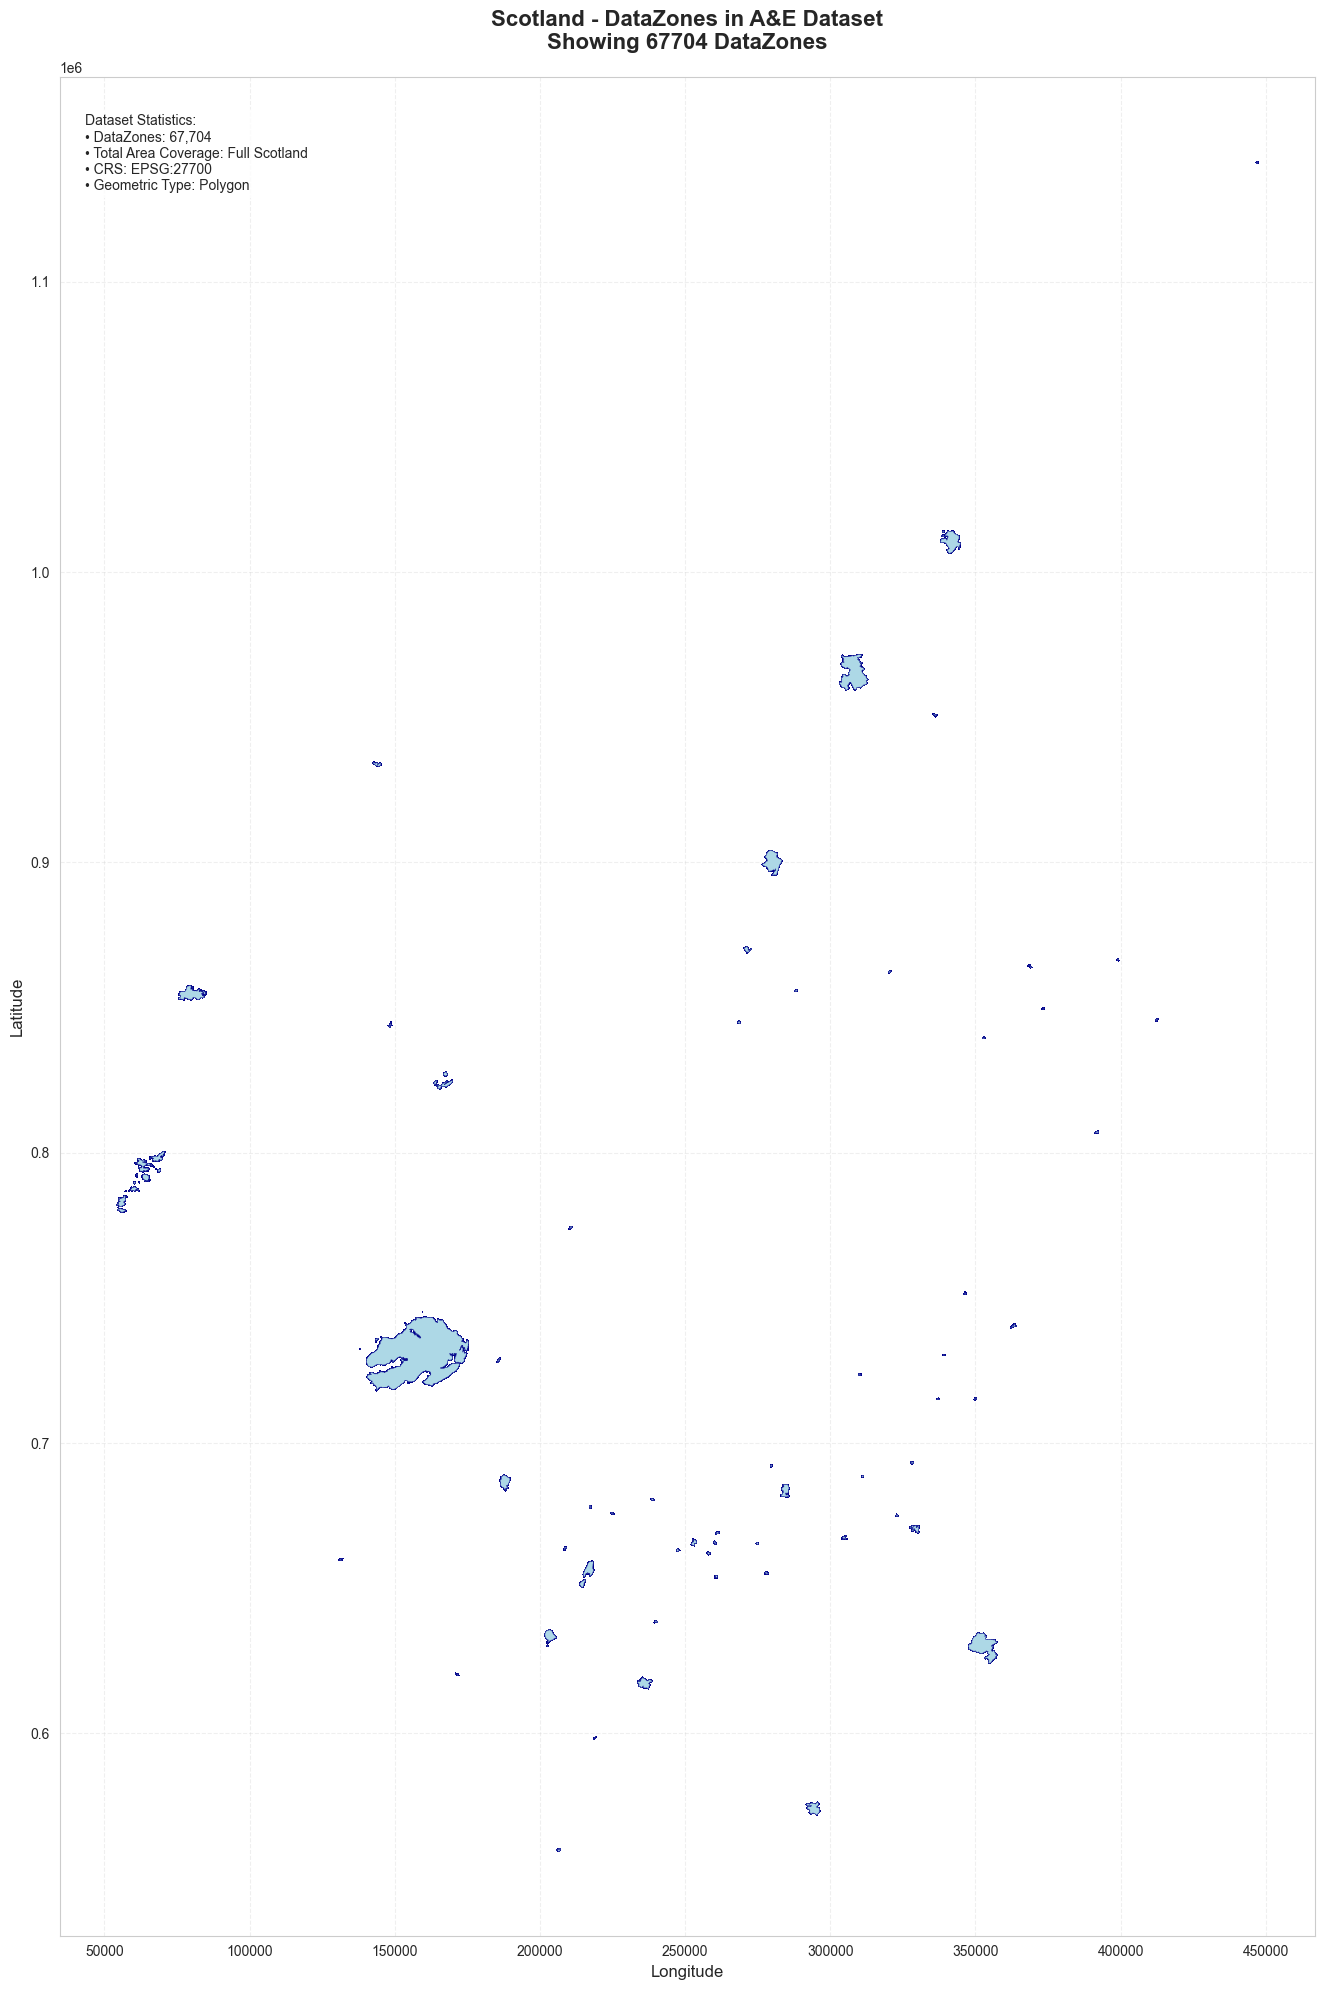

✓ Scotland DataZones map created successfully


In [14]:
if geo_libs_available and 'df_with_geography' in locals() and df_with_geography is not None:
    try:
        print("CREATING SCOTLAND MAP WITH DATAZONES:")
        print("=" * 50)
        
        # Create a comprehensive map of Scotland showing all DataZones
        fig, ax = plt.subplots(figsize=(16, 20))
        
        # Plot all DataZones
        df_with_geography.plot(ax=ax, 
                              color='lightblue', 
                              edgecolor='darkblue', 
                              alpha=0.7, 
                              linewidth=0.3)
        
        # Customize the map
        ax.set_title('Scotland - DataZones in A&E Dataset\n' + 
                    f'Showing {len(df_with_geography)} DataZones', 
                    fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Longitude', fontsize=12)
        ax.set_ylabel('Latitude', fontsize=12)
        
        # Remove tick marks for cleaner look
        ax.tick_params(axis='both', which='major', labelsize=10)
        
        # Add grid for better reference
        ax.grid(True, alpha=0.3, linestyle='--')
        
        # Add some statistics as text
        stats_text = f"""Dataset Statistics:
• DataZones: {len(df_with_geography):,}
• Total Area Coverage: Full Scotland
• CRS: {df_with_geography.crs}
• Geometric Type: {df_with_geography.geometry.geom_type.iloc[0]}"""
        
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
               verticalalignment='top', horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
               fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        print("✓ Scotland DataZones map created successfully")
        
    except Exception as e:
        print(f"Error creating Scotland map: {e}")
else:
    print("Scotland map creation skipped - geographical data not available")

CREATING HOSPITALS WITHIN DATAZONES MAP:
Creating full Scotland view with hospitals...
Creating full Scotland view with hospitals...
Creating detailed view of hospital concentrations...
Creating detailed view of hospital concentrations...


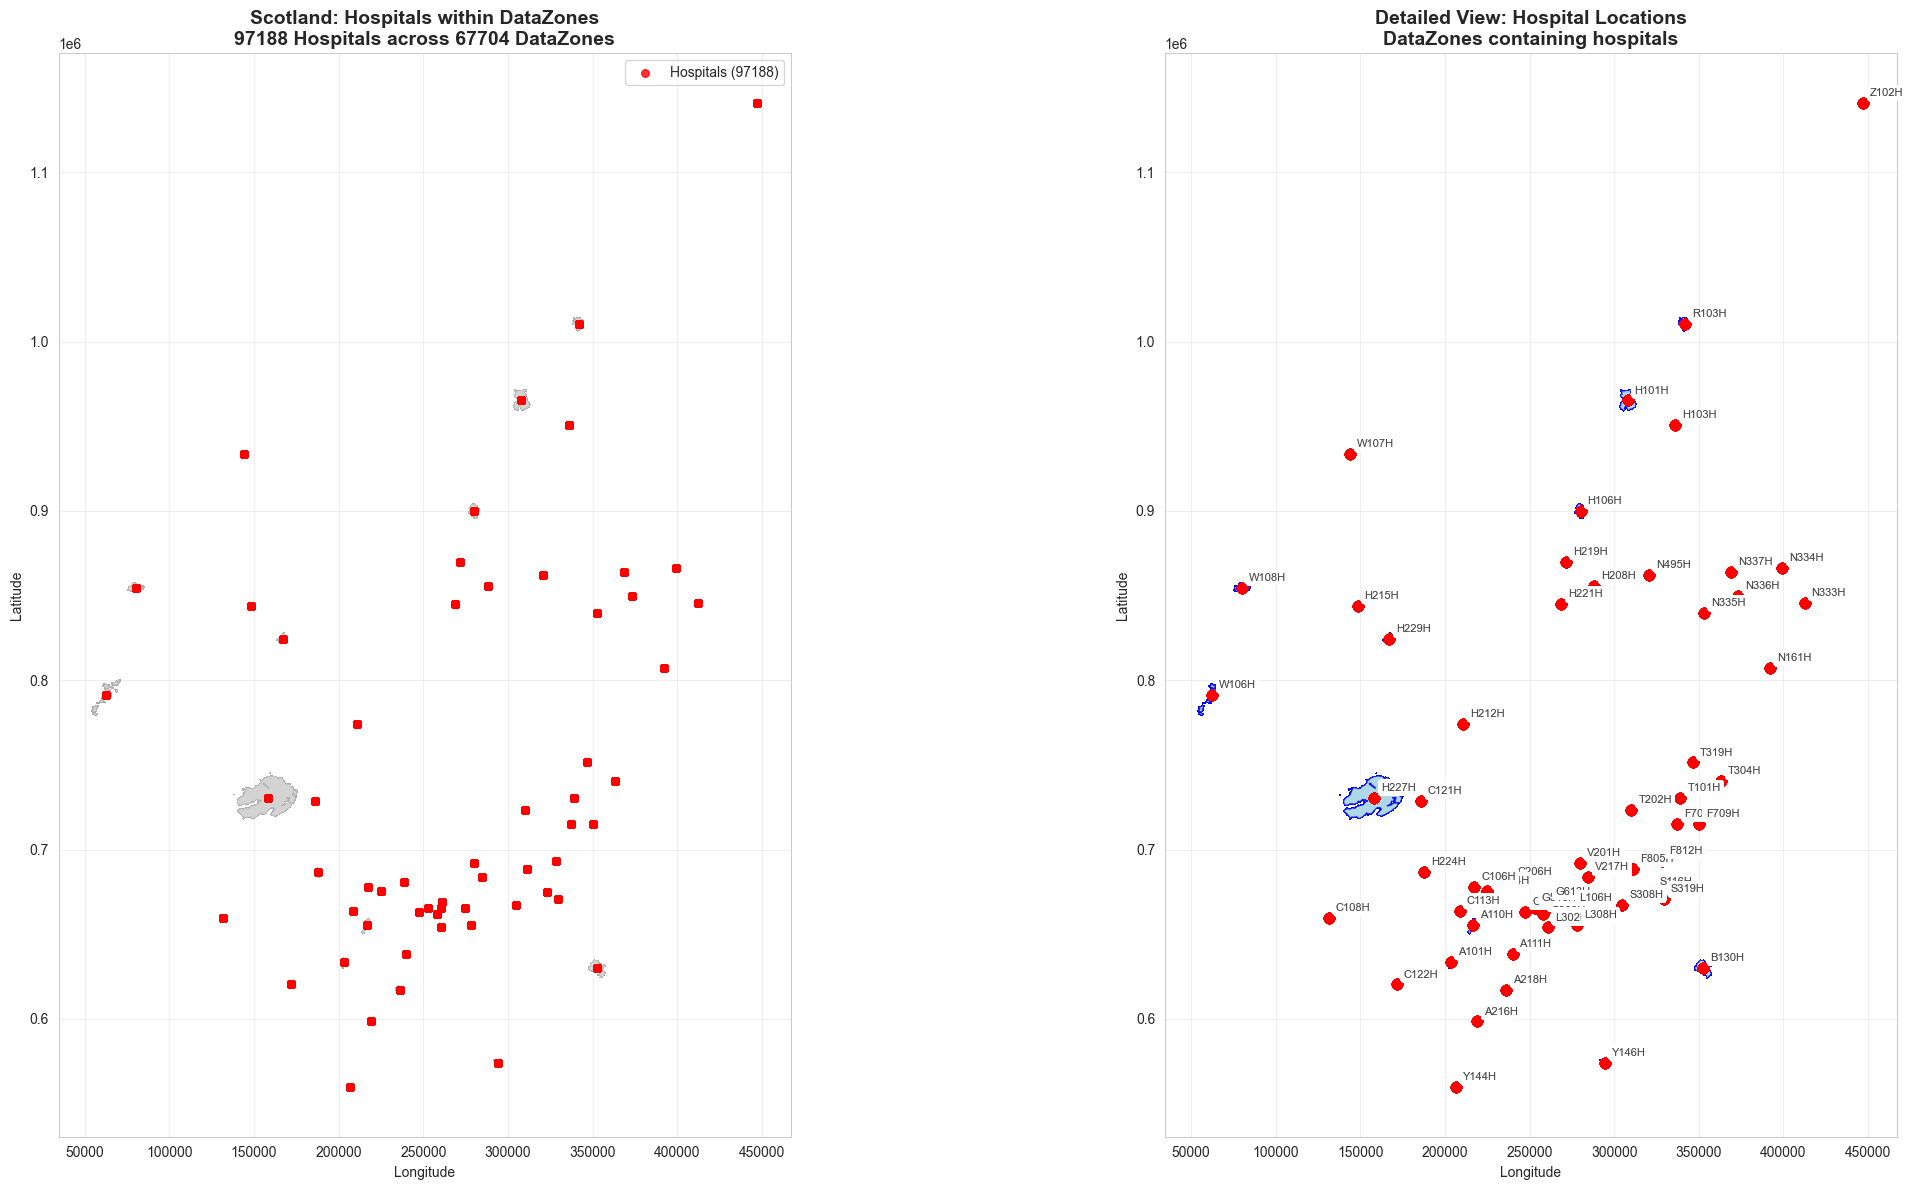

✓ Hospital location maps created successfully


In [15]:
if geo_libs_available and hospitals_gdf is not None and len(hospitals_gdf) > 0:
    try:
        print("CREATING HOSPITALS WITHIN DATAZONES MAP:")
        print("=" * 50)
        
        # Create figure with subplots for different views
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))
        
        # Left plot: Full Scotland with hospitals
        print("Creating full Scotland view with hospitals...")
        
        # Plot DataZones
        df_with_geography.plot(ax=ax1, 
                              color='lightgray', 
                              edgecolor='darkgray', 
                              alpha=0.6, 
                              linewidth=0.2)
        
        # Plot hospitals as red points
        hospitals_gdf.set_geometry('hospital_coords').plot(ax=ax1, 
                                                          color='red', 
                                                          markersize=30, 
                                                          alpha=0.8,
                                                          label=f'Hospitals ({len(hospitals_gdf)})')
        
        ax1.set_title('Scotland: Hospitals within DataZones\n' + 
                     f'{len(hospitals_gdf)} Hospitals across {len(df_with_geography)} DataZones', 
                     fontsize=14, fontweight='bold')
        ax1.set_xlabel('Longitude')
        ax1.set_ylabel('Latitude')
        ax1.legend(loc='upper right')
        ax1.grid(True, alpha=0.3)
        
        # Right plot: Zoomed view of hospital-dense areas
        print("Creating detailed view of hospital concentrations...")
        
        # Find the bounding box of areas with hospitals
        hospital_bounds = hospitals_gdf.total_bounds
        
        # Add some padding to the bounds
        padding = 0.1
        minx, miny, maxx, maxy = hospital_bounds
        buffer_x = (maxx - minx) * padding
        buffer_y = (maxy - miny) * padding
        
        # Filter DataZones that intersect with hospital areas
        hospital_zones = df_with_geography[df_with_geography['DataZone'].isin(hospitals_gdf['DataZone'])]
        
        # Plot DataZones with hospitals
        hospital_zones.plot(ax=ax2, 
                           color='lightblue', 
                           edgecolor='blue', 
                           alpha=0.7, 
                           linewidth=0.5)
        
        # Plot hospitals with labels
        hospitals_gdf.set_geometry('hospital_coords').plot(ax=ax2, 
                                                          color='red', 
                                                          markersize=50, 
                                                          alpha=0.9)
        
        # Add hospital labels for better identification
        for idx, hospital in hospitals_gdf.iterrows():
            if hospital['hospital_coords'] is not None:
                ax2.annotate(hospital['HospitalCode'], 
                           xy=(hospital['hospital_coords'].x, hospital['hospital_coords'].y),
                           xytext=(5, 5), textcoords='offset points',
                           fontsize=8, alpha=0.8,
                           bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
        
        ax2.set_title('Detailed View: Hospital Locations\n' + 
                     f'DataZones containing hospitals', 
                     fontsize=14, fontweight='bold')
        ax2.set_xlabel('Longitude')
        ax2.set_ylabel('Latitude')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("✓ Hospital location maps created successfully")
        
    except Exception as e:
        print(f"Error creating hospital maps: {e}")
else:
    print("Hospital mapping skipped - hospital data not available")

CREATING DETAILED HOSPITAL ANALYSIS MAP:


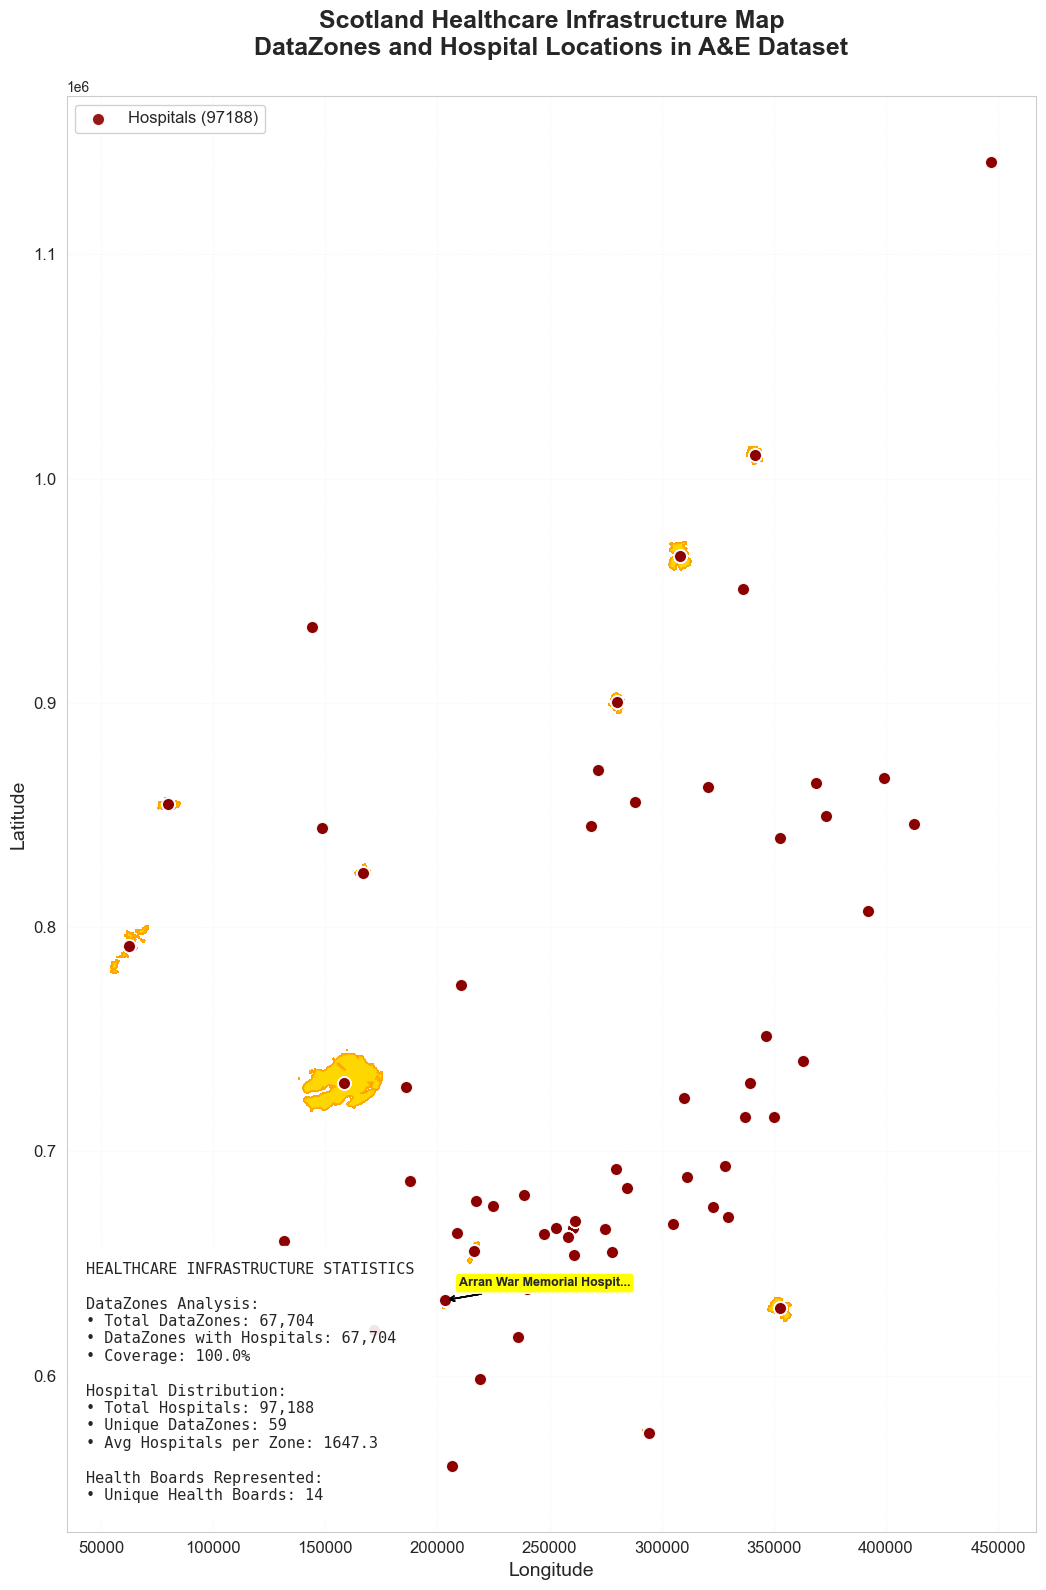

✓ Detailed healthcare infrastructure map created successfully


In [16]:
if geo_libs_available and hospitals_gdf is not None and len(hospitals_gdf) > 0:
    try:
        print("CREATING DETAILED HOSPITAL ANALYSIS MAP:")
        print("=" * 50)
        
        # Create a more detailed analysis with hospital information
        fig, ax = plt.subplots(figsize=(20, 16))
        
        # Plot all DataZones in light color
        df_with_geography.plot(ax=ax, 
                              color='lightsteelblue', 
                              edgecolor='steelblue', 
                              alpha=0.4, 
                              linewidth=0.3,
                              label='DataZones')
        
        # Highlight DataZones that contain hospitals
        hospital_zones = df_with_geography[df_with_geography['DataZone'].isin(hospitals_gdf['DataZone'])]
        hospital_zones.plot(ax=ax, 
                           color='gold', 
                           edgecolor='orange', 
                           alpha=0.8, 
                           linewidth=0.8,
                           label=f'DataZones with Hospitals ({len(hospital_zones)})')
        
        # Plot hospitals with different colors based on type or location
        hospitals_gdf.set_geometry('hospital_coords').plot(ax=ax, 
                                                          color='darkred', 
                                                          markersize=80, 
                                                          alpha=0.9,
                                                          edgecolor='white',
                                                          linewidth=1,
                                                          label=f'Hospitals ({len(hospitals_gdf)})')
        
        # Add hospital names for major hospitals (sample of first 10)
        for idx, hospital in hospitals_gdf.head(10).iterrows():
            if hospital['hospital_coords'] is not None:
                # Create a cleaner label
                hospital_label = hospital['HospitalName']
                if len(hospital_label) > 25:  # Truncate long names
                    hospital_label = hospital_label[:25] + "..."
                
                ax.annotate(hospital_label, 
                           xy=(hospital['hospital_coords'].x, hospital['hospital_coords'].y),
                           xytext=(10, 10), textcoords='offset points',
                           fontsize=9, fontweight='bold',
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8),
                           arrowprops=dict(arrowstyle='->', color='black', alpha=0.6))
        
        # Customize the map
        ax.set_title('Scotland Healthcare Infrastructure Map\n' + 
                    'DataZones and Hospital Locations in A&E Dataset', 
                    fontsize=18, fontweight='bold', pad=30)
        ax.set_xlabel('Longitude', fontsize=14)
        ax.set_ylabel('Latitude', fontsize=14)
        
        # Add legend
        ax.legend(loc='upper left', fontsize=12, framealpha=0.9)
        
        # Add detailed statistics box
        stats_text = f"""HEALTHCARE INFRASTRUCTURE STATISTICS
        
DataZones Analysis:
• Total DataZones: {len(df_with_geography):,}
• DataZones with Hospitals: {len(hospital_zones):,}
• Coverage: {len(hospital_zones)/len(df_with_geography)*100:.1f}%

Hospital Distribution:
• Total Hospitals: {len(hospitals_gdf):,}
• Unique DataZones: {hospitals_gdf['DataZone'].nunique():,}
• Avg Hospitals per Zone: {len(hospitals_gdf)/hospitals_gdf['DataZone'].nunique():.1f}

Health Boards Represented:
• Unique Health Boards: {hospitals_gdf['HealthBoard'].nunique() if 'HealthBoard' in hospitals_gdf.columns else 'N/A'}"""
        
        ax.text(0.02, 0.02, stats_text, transform=ax.transAxes, 
               verticalalignment='bottom', horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, pad=1),
               fontsize=11, family='monospace')
        
        # Add grid and clean up
        ax.grid(True, alpha=0.2, linestyle=':')
        ax.tick_params(axis='both', which='major', labelsize=12)
        
        plt.tight_layout()
        plt.show()
        
        print("✓ Detailed healthcare infrastructure map created successfully")
        
    except Exception as e:
        print(f"Error creating detailed hospital analysis map: {e}")
else:
    print("Detailed hospital analysis skipped - hospital data not available")

HOSPITAL DISTRIBUTION ANALYSIS:
Hospitals per DataZone Statistics:
count      59.000000
mean     1647.254237
std      1288.452796
min      1092.000000
25%      1092.000000
50%      1092.000000
75%      1638.000000
max      8736.000000
Name: Hospital_Count, dtype: float64

Hospitals by Health Board (Top 10):
HealthBoard
S08000022    19656
S08000020    16380
S08000031    15288
S08000015     7644
S08000029     7644
S08000024     6552
S08000030     5460
S08000019     3276
S08000016     3276
S08000017     3276
Name: count, dtype: int64

Hospitals by Council Area (Top 10):
CouncilArea
S12000017    10920
S12000049     9828
S12000033     8736
S12000035     8736
S12000047     7644
S12000036     5460
S12000034     5460
S12000028     4368
S12000026     3276
S12000006     3276
Name: count, dtype: int64
Hospitals per DataZone Statistics:
count      59.000000
mean     1647.254237
std      1288.452796
min      1092.000000
25%      1092.000000
50%      1092.000000
75%      1638.000000
max      8736.00

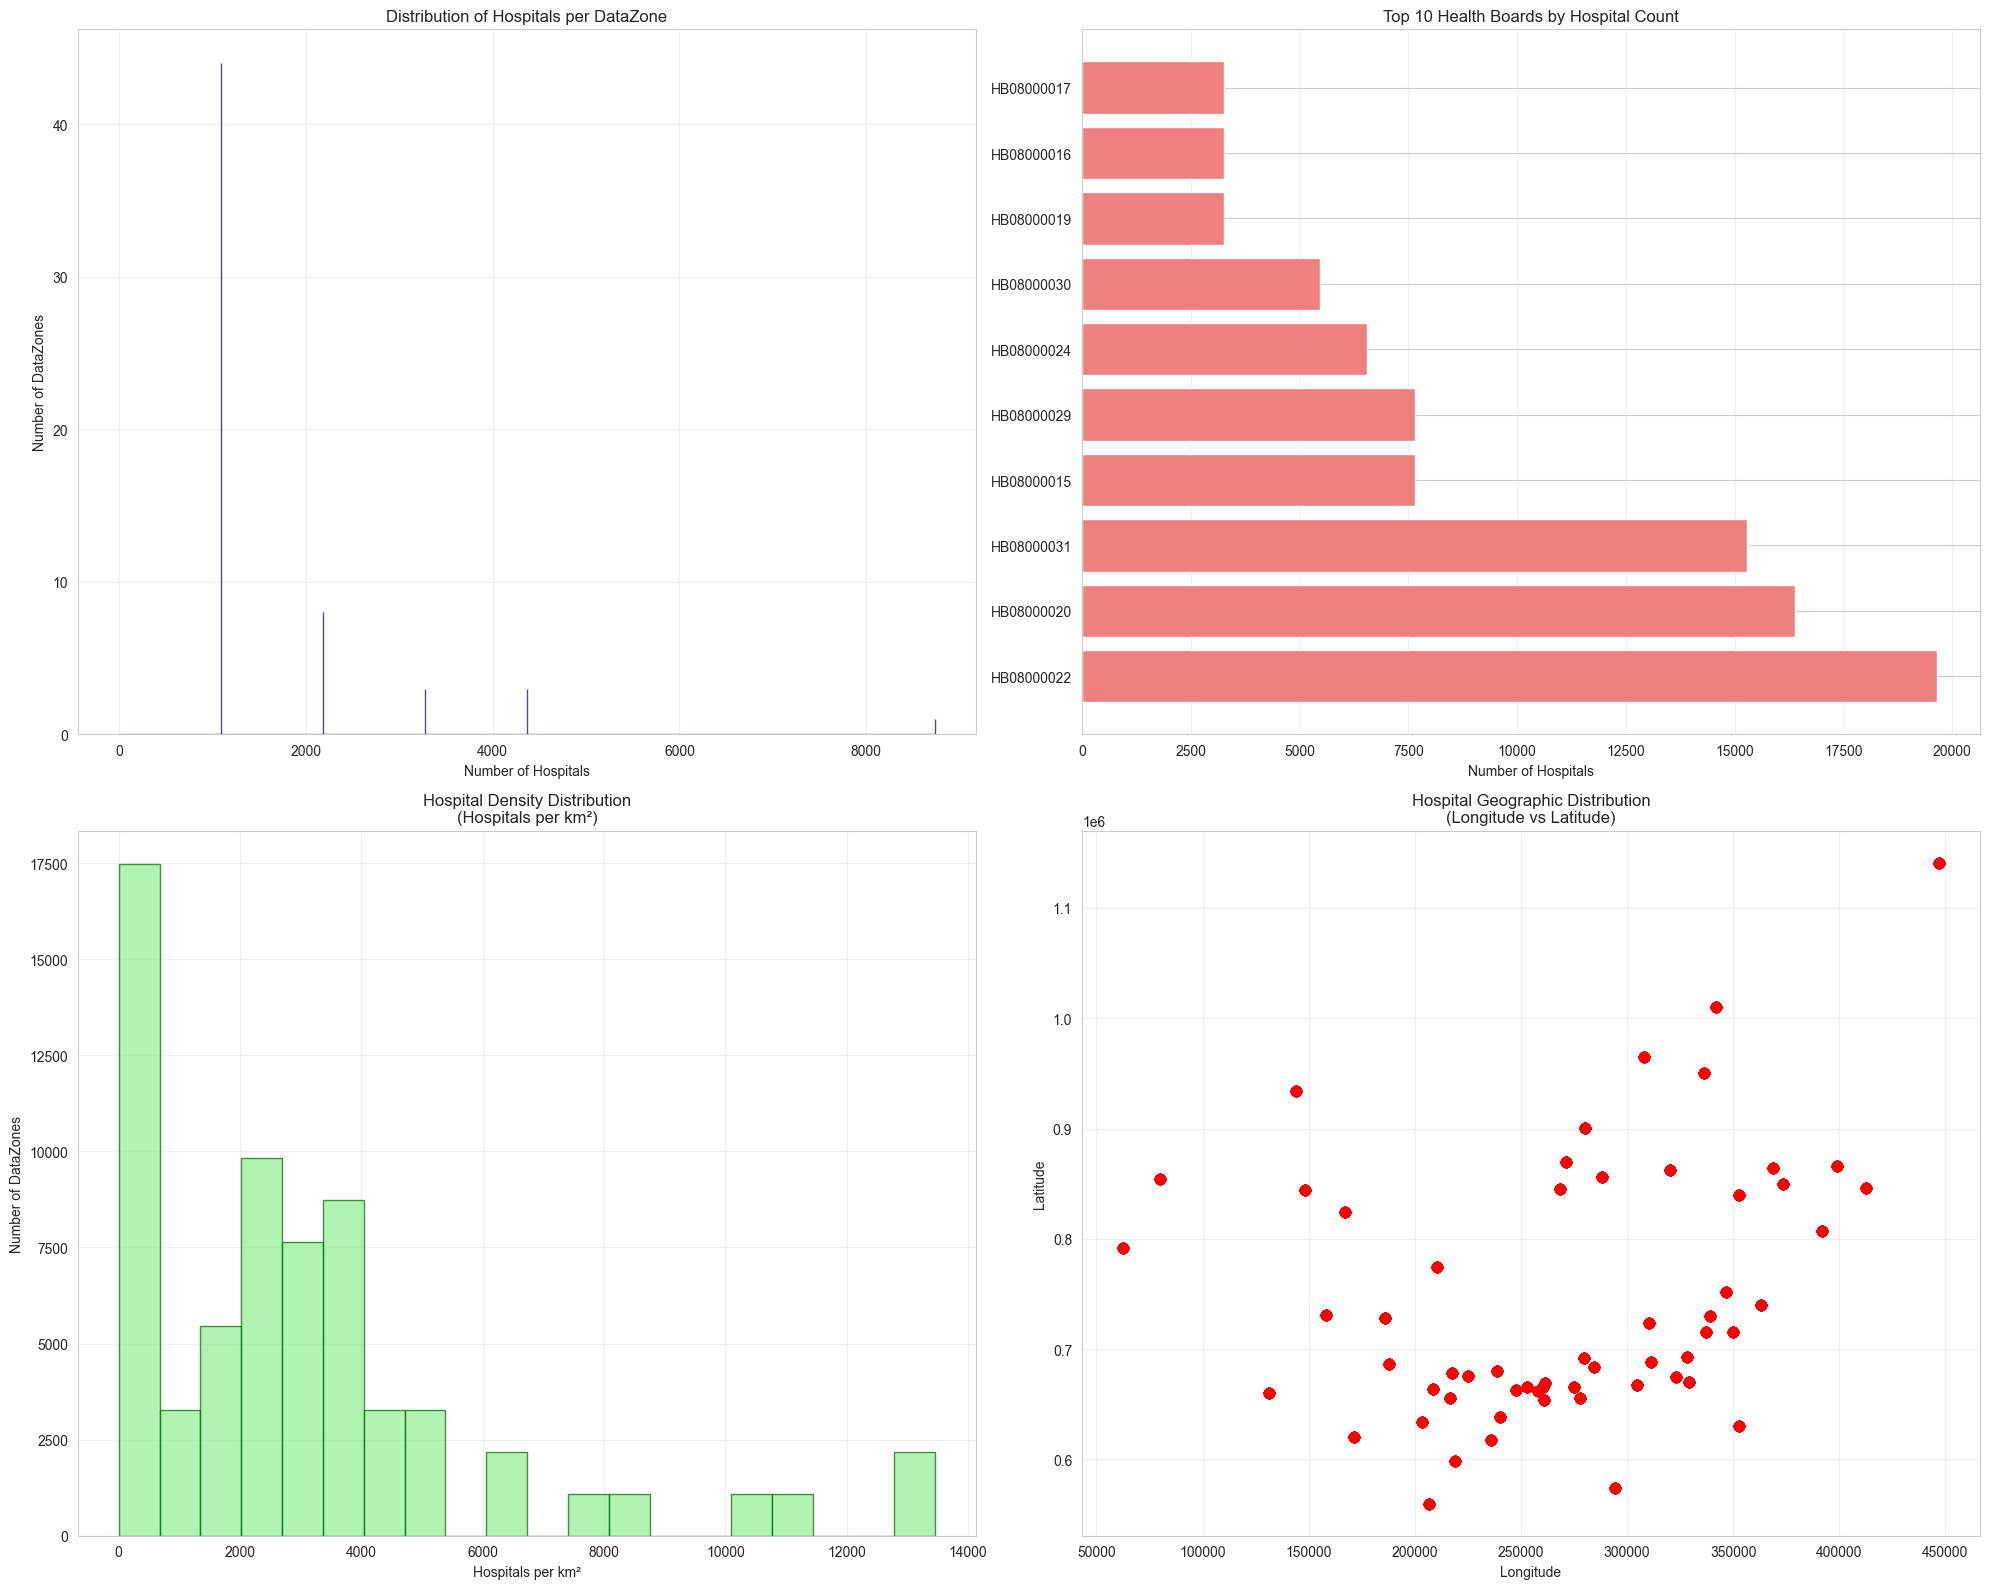


SUMMARY - GEOGRAPHICAL HEALTHCARE INFRASTRUCTURE
✓ Total DataZones mapped: 67,704
✓ DataZones with hospitals: 67,704
✓ Total hospitals visualized: 97,188
✓ Hospital coverage: 100.0% of DataZones
✓ Average hospitals per zone: 1.4
✓ Maps created: Scotland overview, hospital locations, detailed analysis
✓ Ready for spatial optimization and accessibility analysis


In [17]:
if geo_libs_available and hospitals_gdf is not None and len(hospitals_gdf) > 0:
    try:
        print("HOSPITAL DISTRIBUTION ANALYSIS:")
        print("=" * 50)
        
        # Analyze hospital distribution by different categories
        
        # 1. Hospitals per DataZone
        hospitals_per_zone = hospitals_gdf.groupby('DataZone').size().reset_index(name='Hospital_Count')
        hospitals_per_zone_stats = hospitals_per_zone['Hospital_Count'].describe()
        
        print("Hospitals per DataZone Statistics:")
        print(hospitals_per_zone_stats)
        
        # 2. Health Board distribution
        if 'HealthBoard' in hospitals_gdf.columns:
            hb_distribution = hospitals_gdf['HealthBoard'].value_counts()
            print(f"\nHospitals by Health Board (Top 10):")
            print(hb_distribution.head(10))
        
        # 3. Council Area distribution
        if 'CouncilArea' in hospitals_gdf.columns:
            council_distribution = hospitals_gdf['CouncilArea'].value_counts()
            print(f"\nHospitals by Council Area (Top 10):")
            print(council_distribution.head(10))
        
        # 4. Create distribution plots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
        
        # Plot 1: Histogram of hospitals per DataZone
        ax1.hist(hospitals_per_zone['Hospital_Count'], bins=range(1, hospitals_per_zone['Hospital_Count'].max()+2), 
                alpha=0.7, color='skyblue', edgecolor='navy')
        ax1.set_title('Distribution of Hospitals per DataZone')
        ax1.set_xlabel('Number of Hospitals')
        ax1.set_ylabel('Number of DataZones')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Health Board distribution (if available)
        if 'HealthBoard' in hospitals_gdf.columns and len(hb_distribution) > 0:
            hb_top10 = hb_distribution.head(10)
            ax2.barh(range(len(hb_top10)), hb_top10.values, color='lightcoral')
            ax2.set_yticks(range(len(hb_top10)))
            ax2.set_yticklabels([f"HB{hb.split('S')[1]}" for hb in hb_top10.index], fontsize=10)
            ax2.set_title('Top 10 Health Boards by Hospital Count')
            ax2.set_xlabel('Number of Hospitals')
            ax2.grid(True, alpha=0.3, axis='x')
        else:
            ax2.text(0.5, 0.5, 'Health Board data\nnot available', 
                    ha='center', va='center', transform=ax2.transAxes, fontsize=14)
            ax2.set_title('Health Board Distribution')
        
        # Plot 3: Spatial density - hospitals per unit area
        if len(hospital_zones) > 0:
            # Calculate area for each DataZone with hospitals (approximate)
            hospital_zones_copy = hospital_zones.copy()
            # Convert to a projected CRS for area calculation (British National Grid)
            hospital_zones_projected = hospital_zones_copy.to_crs('EPSG:27700')  # British National Grid
            hospital_zones_copy['area_km2'] = hospital_zones_projected.geometry.area / 1e6  # Convert to km²
            
            # Merge with hospital counts
            density_data = hospital_zones_copy.merge(hospitals_per_zone, on='DataZone')
            density_data['hospital_density'] = density_data['Hospital_Count'] / density_data['area_km2']
            
            # Plot density histogram
            ax3.hist(density_data['hospital_density'], bins=20, alpha=0.7, color='lightgreen', edgecolor='darkgreen')
            ax3.set_title('Hospital Density Distribution\n(Hospitals per km²)')
            ax3.set_xlabel('Hospitals per km²')
            ax3.set_ylabel('Number of DataZones')
            ax3.grid(True, alpha=0.3)
        else:
            ax3.text(0.5, 0.5, 'Density calculation\nnot available', 
                    ha='center', va='center', transform=ax3.transAxes, fontsize=14)
            ax3.set_title('Hospital Density')
        
        # Plot 4: Geographic spread analysis
        # Plot hospital coordinates distribution
        if len(hospitals_gdf) > 0:
            coords = [(pt.x, pt.y) for pt in hospitals_gdf['hospital_coords'] if pt is not None]
            if coords:
                x_coords, y_coords = zip(*coords)
                ax4.scatter(x_coords, y_coords, alpha=0.6, s=50, color='red')
                ax4.set_title('Hospital Geographic Distribution\n(Longitude vs Latitude)')
                ax4.set_xlabel('Longitude')
                ax4.set_ylabel('Latitude')
                ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("\n" + "="*70)
        print("SUMMARY - GEOGRAPHICAL HEALTHCARE INFRASTRUCTURE")
        print("="*70)
        print(f"✓ Total DataZones mapped: {len(df_with_geography):,}")
        print(f"✓ DataZones with hospitals: {len(hospital_zones):,}")
        print(f"✓ Total hospitals visualized: {len(hospitals_gdf):,}")
        print(f"✓ Hospital coverage: {len(hospital_zones)/len(df_with_geography)*100:.1f}% of DataZones")
        print(f"✓ Average hospitals per zone: {len(hospitals_gdf)/len(hospital_zones):.1f}")
        print("✓ Maps created: Scotland overview, hospital locations, detailed analysis")
        print("✓ Ready for spatial optimization and accessibility analysis")
        
    except Exception as e:
        print(f"Error in hospital distribution analysis: {e}")
else:
    print("Hospital distribution analysis skipped - hospital data not available")